##  Imports

In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [3]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1583452800&to=1586131200"

In [15]:
btc = requests.get(url)
bitcoin = btc.json()

In [16]:
btc_df = pd.DataFrame(bitcoin["prices"], columns = ["Timestamp", "Price in USD"])

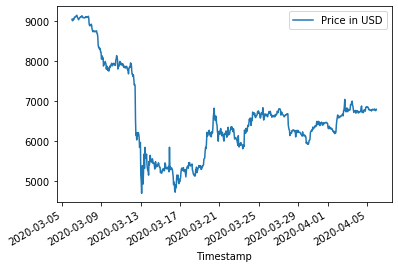

In [21]:
btc_df["Timestamp"] = pd.to_datetime(btc_df["Timestamp"], unit = "ms")
btc_df.set_index("Timestamp", inplace=True)
btc_df.plot()

# Litecoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [22]:
the_coin = "litecoin"

In [23]:
url = f"https://api.coingecko.com/api/v3/coins/{the_coin}/market_chart/range?vs_currency=usd&from=1583452800&to=1586131200"

In [24]:
ltc = requests.get(url)
litecoin = ltc.json()

In [25]:
ltc_df = pd.DataFrame(litecoin["prices"], columns = ["Timestamp", "Price in USD"])

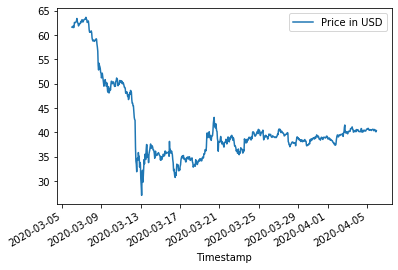

In [27]:
ltc_df["Timestamp"] = pd.to_datetime(ltc_df["Timestamp"], unit = "ms")
ltc_df.set_index("Timestamp", inplace=True)
ltc_df.plot()

## Plot Litecoin and Dogecoin prices in a lineplot for each

In [28]:
coin = "dogecoin"
url = f"https://api.coingecko.com/api/v3/coins/{coin}/market_chart/range?vs_currency=usd&from=1583452800&to=1586131200"

In [29]:
dog = requests.get(url)
dogecoin = dog.json()

In [44]:
dog_df = pd.DataFrame(dogecoin["prices"], columns = ["Timestamp", "Price in USD"])
dog_df["Timestamp"] = pd.to_datetime(dog_df["Timestamp"], unit = "ms")
dog_df.set_index("Timestamp", inplace=True)

dog_df.plot()
ltc_df.plot()

Timestamp       datetime64[ns]
Price in USD           float64
dtype: object

In [2]:
url = "https://api.coingecko.com/api/v3/coins/list"

In [3]:
coin_list = requests.get(url)

In [5]:
coins = coin_list.json()

In [7]:
df = pd.DataFrame(coins)

In [20]:
df = df.sort_values("symbol").reset_index(drop=True)

In [31]:
df = df.iloc[0:10,[0,2]]

,id,name
0,money,Money
1,oxbitcoin,0xBitcoin
2,buttcoin,ButtCoin
3,0xeth-cash,0xETH Cash
4,0xeth-sv,0xETH SV
5,0xeth-classic,0xETH Classic
6,0xethereum-token,0xEthereum Token
7,0xmaker-token,0xMaker Token
8,10m-token,10M Token
9,1337,Elite


In [32]:
df.to_csv("top_10_reports.csv")

# Top Ten Coins Report

## List the first 10 coingecko currencies in a DataFrame

## Make a csv called 'top_ten_report.csv' and check that it worked